▪ Use famous iris flower dataset from sklearn.datasets to predict flower species using random
forest classifier.▪ Measure prediction score using default n_estimators (10)
▪ Now fine tune your model by changing number of trees in your classifer and tell me what
best score you can get using how many trees

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [4]:
rf_default = RandomForestClassifier(n_estimators=10, random_state=42)
rf_default.fit(X_train, y_train)
y_pred_default = rf_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

In [5]:
best_score = 0
best_n_estimators = 0

In [6]:
n_estimators_values = [10, 50, 100, 150, 200]

for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_score:
        best_score = accuracy
        best_n_estimators = n_estimators

In [7]:
print("Accuracy with default n_estimators=10:", accuracy_default)
print("Best accuracy with n_estimators =", best_n_estimators, ":", best_score)

Accuracy with default n_estimators=10: 0.8888888888888888
Best accuracy with n_estimators = 10 : 0.8888888888888888


Another Code

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [9]:
iris = load_iris()
X = iris.data
y = iris.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [11]:
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'n_estimators': [10, 50, 100, 150, 200]})

In [12]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)
best_accuracy = accuracy_score(y_test, y_pred_best)

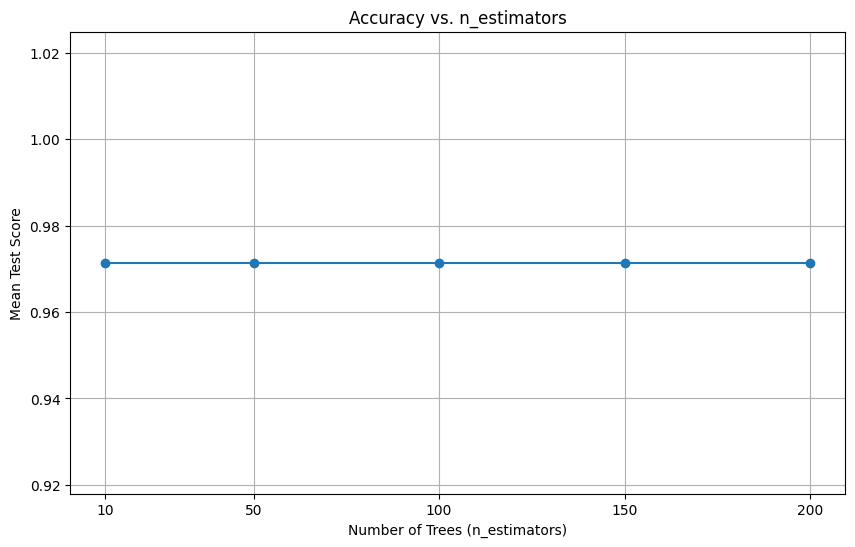

In [13]:
results = grid_search.cv_results_
n_estimators_values = param_grid['n_estimators']
mean_scores = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, mean_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. n_estimators')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Mean Test Score')
plt.grid(True)
plt.xticks(n_estimators_values)
plt.show()

In [14]:
print("Best accuracy with n_estimators =", best_rf.n_estimators, ":", best_accuracy)

Best accuracy with n_estimators = 10 : 0.8888888888888888
